In [52]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\AMIT\OneDrive\Documents\keggle Data Sets\retail_sales_dataset.csv', parse_dates=['Date'])
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [3]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


# Total Sell

In [4]:
df['Total Amount'].sum()

np.int64(456000)

- that is $456000

# Average Transaction Value

In [5]:
df['Total Amount'].mean()

np.float64(456.0)

# Unique Customers

In [6]:
df['Customer ID'].nunique()

1000

# Customers by Age

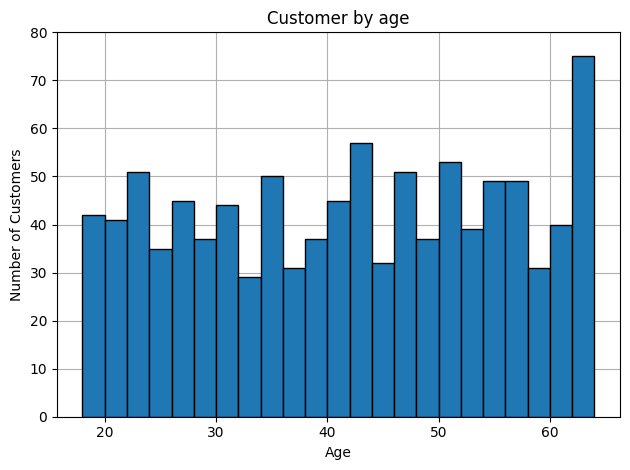

In [91]:
age = df['Age']
age.plot.hist(bins=23, edgecolor='black', zorder=2)
plt.title('Customer by age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.ylim(0,80)
plt.grid(zorder=0)
plt.tight_layout()
plt.savefig('Customer_by_age.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Customers by Gender

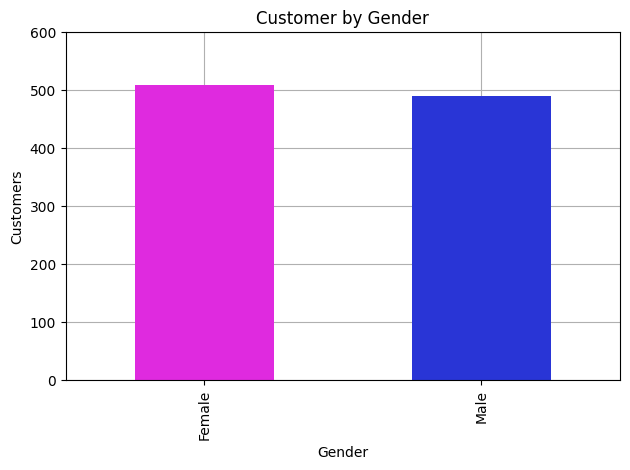

In [92]:
gender = df['Gender'].value_counts()
gender.plot.bar(color=["#DF2ADF","#2935D6"], zorder=2)
plt.title('Customer by Gender')
plt.xlabel('Gender')
plt.ylabel('Customers')
plt.ylim(0,600)
plt.grid(zorder=0)
plt.tight_layout()
plt.savefig('Customer_by_gender.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Most Sold Product Category

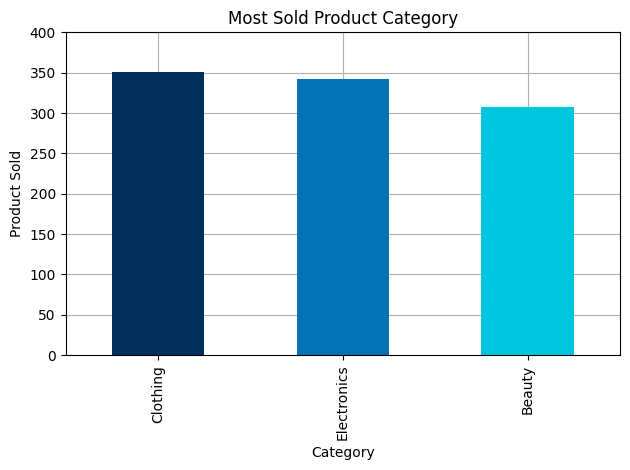

In [114]:
Catg = df['Product Category'].value_counts()
Catg.plot.bar(color=["#002F5C", "#0372B3", "#00C5DF"], zorder=2)
plt.title('Most Sold Product Category')
plt.xlabel('Category')
plt.ylabel('Product Sold')
plt.ylim(0,400)
plt.grid(zorder=0)
plt.tight_layout()
plt.savefig('most_sold_category.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Comparison: Product Category v/s Total Sales Amount

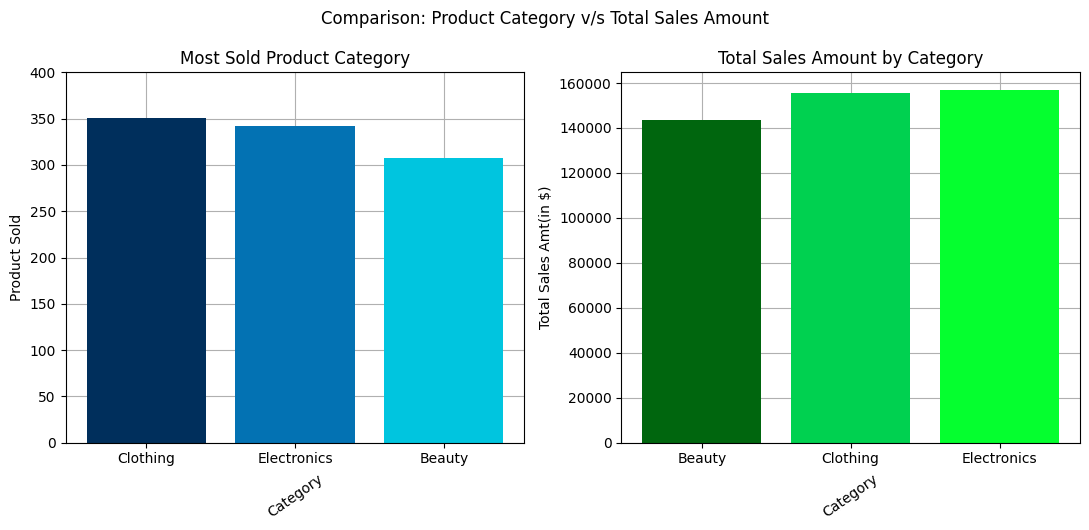

In [134]:
fig, ax = plt.subplots(1,2, figsize=(11,5))
ax[0].bar(Catg.index, Catg.values, color=["#002F5C", "#0372B3", "#00C5DF"], zorder=2)
ax[0].set_title('Most Sold Product Category')
ax[0].set_xlabel('Category', rotation=35)
ax[0].set_ylabel('Product Sold')
ax[0].grid()
ax[0].set_ylim(0,400)

Catg_sales_amt = df.groupby('Product Category')['Total Amount'].sum()
ax[1].bar(Catg_sales_amt.index ,Catg_sales_amt.values , color=["#00660E", "#00D150", "#05FF2F"], zorder=2)
ax[1].set_title('Total Sales Amount by Category')
ax[1].set_xlabel('Category', rotation=35)
ax[1].set_ylabel('Total Sales Amt(in $)')
ax[1].grid()

plt.tight_layout()
plt.suptitle('Comparison: Product Category v/s Total Sales Amount', y=1.05)
plt.savefig('Comparison_catg_vs_amount.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [104]:
Catg_sales_amt

,Total Amount
Product Category,
Beauty,143515
Clothing,155580
Electronics,156905


# Most crowded WeekDay

In [13]:
df['Day'] = df['Date'].dt.day_name()
day = df.groupby('Day')[['Total Amount']].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day = day.reindex(weekday_order)
day

,Total Amount
Day,
Monday,70250
Tuesday,69440
Wednesday,58770
Thursday,53835
Friday,66290
Saturday,78815
Sunday,58600


In [14]:
day_count = df['Day'].value_counts()
day_count =day_count.reindex(weekday_order)

# Comparison: Total Sales V/S Total Sales Amount

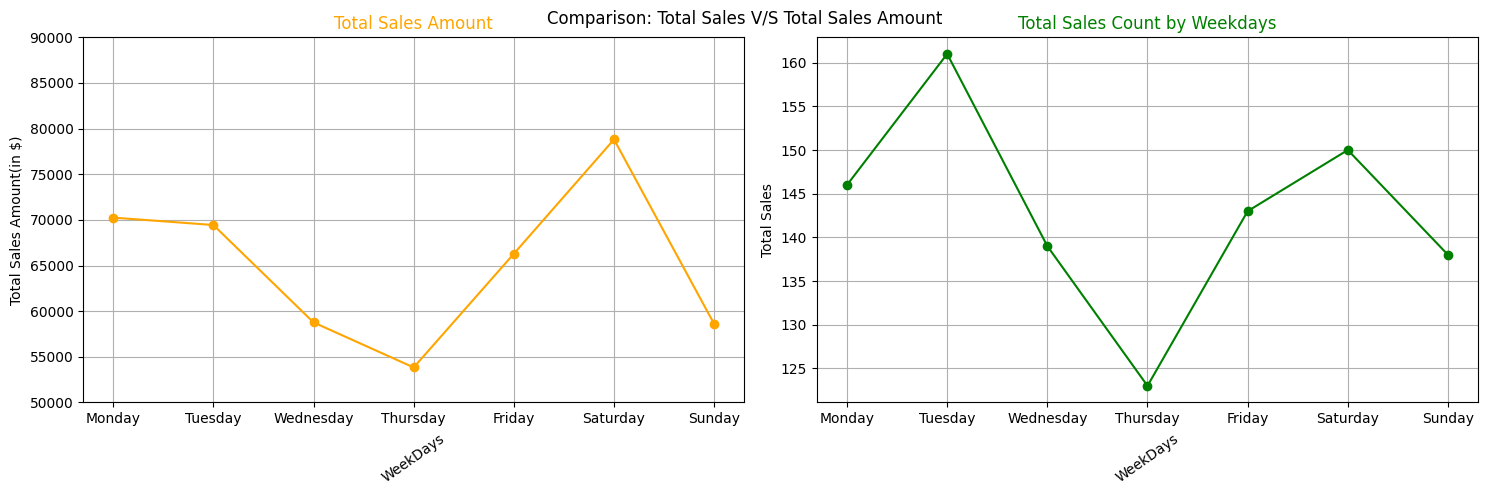

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(day,marker='o', color='orange', label='Total $ Sales by Weekdays')
ax[0].set_title('Total Sales Amount', color= 'orange')
ax[0].set_xlabel('WeekDays', rotation=35)
ax[0].set_ylabel('Total Sales Amount(in $)')
ax[0].grid()
ax[0].set_ylim(50000, 90000)

ax[1].plot(day_count,marker='o', color='green', label='Total Sale Count by Weekdays')
ax[1].set_title('Total Sales Count by Weekdays', color='green')
ax[1].set_xlabel('WeekDays', rotation=35)
ax[1].set_ylabel('Total Sales')
ax[1].grid()

plt.tight_layout()
plt.suptitle('Comparison: Total Sales V/S Total Sales Amount')
plt.savefig('Comparison_sales_vs_amount.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Sales Trend for the Year 2023

#### Setting date coloumn as index of the data frame

In [136]:
#df = df.set_index('Date')
df.sort_index().head(2)


,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-01-01,522,CUST522,Male,46,Beauty,3,500,1500
2023-01-01,180,CUST180,Male,41,Clothing,3,300,900


#### Sales Trend on Weekly Bases

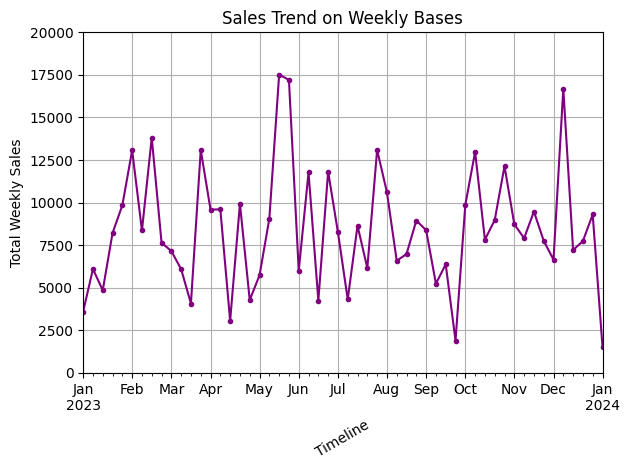

In [72]:
y_trend = df['Total Amount'].resample('W').sum()
y_trend.plot(marker='o',markersize=3, color='purple', label='Sales Trend on Weekly Bases')
plt.title('Sales Trend on Weekly Bases')
plt.xlabel('Timeline', rotation=30)
plt.ylabel('Total Weekly Sales')
plt.ylim(0,20000)
plt.grid(zorder=0)
plt.tight_layout()
plt.savefig('Sales_Trend_Weekly.pdf', dpi=300, bbox_inches='tight')
plt.show()